In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

In [2]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 0.1, prior='log-uniform'),
                'l1_ratio': Real(0.0, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import xgboost as xgb
from base_regressor import BaseRegressor
from Plotter import Plotter

from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 5000),
                'learning_rate': Real(0.0001, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 10),
                'subsample': Real(0.1, 1.0),
                'colsample_bytree': Real(0.1, 1.0)
            }

In [4]:
from base_classifier import BaseClassifier
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una función para graficar el boxplot
def graficar_boxplot_horizontal(dataframes, labels, variable, group_by, colores, title="Boxplot por Región"):
   
    # Crear una lista para almacenar los datos combinados
    datos_combinados = []
    for df, label in zip(dataframes, labels):
        temp_df = df[[group_by, variable]].copy()
        temp_df['Dataset'] = label
        datos_combinados.append(temp_df)
    
    # Concatenar todos los dataframes
    datos_combinados = pd.concat(datos_combinados, ignore_index=True)

    # Crear el gráfico de boxplot
    plt.figure(figsize=(8, 8))
    sns.boxplot(
        data=datos_combinados, 
        y=group_by, 
        x=variable, 
        hue='Dataset',
        palette=colores
    )
    plt.title(title, fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel(group_by, fontsize=14)
    plt.legend(title='Dataset', fontsize=12, loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [6]:
from Plotter import Plotter
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model_reg = ElasticNetRegressor()

Plotters = Plotter()

# Parametros de Plot
colorset = 'darkorange'
nameset = 'ElasticNet'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()

model_cls = XGBoostClassifier()


In [31]:
# 72 Features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

In [32]:
#Turquia
features_1 =['TF_HPC_right', 'TF_HPC_left', 'High_subj_spec_EPP_PARIET_right', 'IAF_ORB_left', 'TF_INS_right', 'TF_ORB_right', 'High_subj_spec_RPD_PARIET_right', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_CING_left', 'TF_IFG_right', 'Low_subj_spec_EPP_OCC_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Alpha2_canon_RPD_CING_left', 'High_subj_spec_EPP_CING_right', 'IAF_OCC_left', 'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_RPD_PARIET_left', 'IAF_OCC_right', 'High_subj_spec_EPP_CING_left', 'Low_subj_spec_RPD_CING_right', 'Alpha2_canon_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_left', 'Low_subj_spec_RPD_CING_left']

In [8]:
features_1 = ['TF_HPC_right', 'TF_IFG_right', 'TF_ORB_right', 'TF_MFG_left', 'TF_ORB_left', 'TF_IFG_left', 'TF_INS_left', 'TF_HPC_left', 'IAF_OCC_left', 'Alpha2_canon_RPD_CING_left', 'TF_INS_right', 'TF_SFG_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'TF_MFG_right', 'IAF_OCC_right', 'Alpha2_canon_RPD_CING_right', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_EPP_PARIET_right', 'IAF_SFG_left', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_RPD_CING_left', 'IAF_MFG_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_CING_right']

In [9]:
len(features_1)

27

In [33]:
# America
features_2 =['High_subj_spec_RPD_HPC_left', 'TF_HPC_right', 'Alpha2_canon_EPP_HPC_left', 'IAF_SFG_left', 'IAF_HPC_right', 'TF_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_HPC_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'Alpha2_canon_RPD_OCC_left', 'TF_INS_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'TF_ORB_right', 'High_subj_spec_RPD_PARIET_right', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_OCC_right', 'IAF_IFG_left', 'IAF_INS_right', 'IAF_IFG_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_CING_left', 'Low_subj_spec_EPP_PARIET_left', 'TF_IFG_right', 'High_subj_spec_RPD_HPC_right', 'Low_subj_spec_EPP_OCC_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_CING_right', 'IAF_ORB_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_EPP_CING_right', 'IAF_HPC_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_OCC_left', 'IAF_INS_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_left', 'High_subj_spec_EPP_HPC_left', 'Alpha2_canon_EPP_OCC_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'IAF_OCC_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_PARIET_left', 'IAF_OCC_right', 'IAF_MFG_left', 'High_subj_spec_EPP_CING_left', 'Low_subj_spec_RPD_CING_right', 'Alpha2_canon_EPP_PARIET_left', 'IAF_MFG_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_CING_left']

In [15]:
features_3 = ['Low_subj_spec_RPD_HPC_left', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_HPC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_EPP_HPC_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'IAF_HPC_left', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_CING_right', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_INS_left', 'IAF_HPC_right', 'IAF_INS_right', 'IAF_OCC_left', 'TF_IFG_right', 'IAF_IFG_right', 'TF_ORB_right', 'IAF_ORB_right', 'IAF_MFG_right', 'IAF_IFG_left', 'TF_HPC_right', 'IAF_OCC_right', 'IAF_MFG_left', 'TF_INS_right', 'Low_subj_spec_EPP_HPC_left', 'IAF_SFG_left', 'Low_subj_spec_EPP_OCC_right', 'TF_HPC_left']

In [53]:
#Borrar
features_3 = [ 'Low_subj_spec_EPP_HPC_left', 'IAF_MFG_right', 'TF_INS_right', 'IAF_MFG_left', 'IAF_SFG_left', 'TF_ORB_right', 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'Low_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_PARIET_right']

In [61]:
len(features_3)

51

In [60]:
features_3 = ['Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'Low_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_PARIET_right']

In [246]:
import random

# Tu lista de características
features_america = ['High_subj_spec_RPD_HPC_left', 'TF_HPC_right', 'Alpha2_canon_EPP_HPC_left', 'IAF_SFG_left', 'IAF_HPC_right', 'TF_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_HPC_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'Alpha2_canon_RPD_OCC_left', 'TF_INS_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'TF_ORB_right', 'High_subj_spec_RPD_PARIET_right', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_OCC_right', 'IAF_IFG_left', 'IAF_INS_right', 'IAF_IFG_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_CING_left', 'Low_subj_spec_EPP_PARIET_left', 'TF_IFG_right', 'High_subj_spec_RPD_HPC_right', 'Low_subj_spec_EPP_OCC_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_CING_right', 'IAF_ORB_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_EPP_CING_right', 'IAF_HPC_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_OCC_left', 'IAF_INS_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_left', 'High_subj_spec_EPP_HPC_left', 'Alpha2_canon_EPP_OCC_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'IAF_OCC_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_PARIET_left', 'IAF_OCC_right', 'IAF_MFG_left', 'High_subj_spec_EPP_CING_left', 'Low_subj_spec_RPD_CING_right', 'Alpha2_canon_EPP_PARIET_left', 'IAF_MFG_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_CING_left']

random.seed(42)
# Mezclar la lista de manera aleatoria
random.shuffle(features_america)

# Dividir la lista en dos partes
split_point = len(features_america) // 2
features_2 = features_america[:split_point]
features_3 = features_america[split_point:]

# Mostrar los resultados
print("Parte 1:", features_2)
print("Parte 2:", features_3)


Parte 1: ['IAF_INS_left', 'Alpha2_canon_RPD_CING_right', 'Low_subj_spec_RPD_CING_right', 'Alpha2_canon_RPD_OCC_left', 'High_subj_spec_RPD_PARIET_right', 'IAF_IFG_left', 'Alpha2_canon_EPP_PARIET_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Alpha2_canon_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'IAF_HPC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'IAF_SFG_left', 'IAF_INS_right', 'Alpha2_canon_RPD_PARIET_left', 'IAF_HPC_right', 'Alpha2_canon_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_right', 'Alpha2_canon_RPD_CING_left', 'IAF_IFG_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_HPC_left', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_PARIET_left', 'IAF_MFG_left']
Parte 2: ['Alpha2_canon_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_CING_left', 'TF_IFG_right', 'Low_subj_spec_EPP_PARIET_right', 'TF_I

In [12]:
len(features_2)

61

# Data

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Age_Clock/data_freq/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Age_Clock/data_freq/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Age_Clock/data_freq/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Age_Clock/data_freq/MCI_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

regiones = ["America", "Turquia", "Europa"]


df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_CN_filtrado = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones)]
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [40]:

X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID_unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID_unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID_unique"]

In [41]:
X_AD_1 = df_AD_filtrado[features_1]
y_AD_1 = df_AD_filtrado["Age"]
ID_AD_1 = df_AD_filtrado["ID_unique"]

X_FTD_1 = df_FTD_filtrado[features_1]
y_FTD_1 = df_FTD_filtrado["Age"]
ID_FTD_1 = df_FTD_filtrado["ID_unique"]

X_MCI_1 = df_MCI_filtrado[features_1]
y_MCI_1 = df_MCI_filtrado["Age"]
ID_MCI_1 = df_MCI_filtrado["ID_unique"]

X_CN_1 = df_CN_filtrado[features_1]
y_CN_1 = df_CN_filtrado["Age"]
ID_CN_1 = df_CN_filtrado["ID_unique"]

In [42]:
X_AD_2 = df_AD_filtrado[features_2]
y_AD_2 = df_AD_filtrado["Age"]
ID_AD_2 = df_AD_filtrado["ID_unique"]

X_FTD_2 = df_FTD_filtrado[features_2]
y_FTD_2 = df_FTD_filtrado["Age"]
ID_FTD_2 = df_FTD_filtrado["ID_unique"]

X_MCI_2 = df_MCI_filtrado[features_2]
y_MCI_2 = df_MCI_filtrado["Age"]
ID_MCI_2 = df_MCI_filtrado["ID_unique"]


X_CN_2 = df_CN_filtrado[features_2]
y_CN_2 = df_CN_filtrado["Age"]
ID_CN_2 = df_CN_filtrado["ID_unique"]


In [63]:
X_AD_3 = df_AD_filtrado[features_3]
y_AD_3 = df_AD_filtrado["Age"]
ID_AD_3 = df_AD_filtrado["ID_unique"]

X_FTD_3 = df_FTD_filtrado[features_3]
y_FTD_3 = df_FTD_filtrado["Age"]
ID_FTD_3 = df_FTD_filtrado["ID_unique"]

X_MCI_3 = df_MCI_filtrado[features_3]
y_MCI_3 = df_MCI_filtrado["Age"]
ID_MCI_3 = df_MCI_filtrado["ID_unique"]


X_CN_3 = df_CN_filtrado[features_3]
y_CN_3 = df_CN_filtrado["Age"]
ID_CN_3 = df_CN_filtrado["ID_unique"]


# Primer Modelo

In [253]:
params_1 = {'alpha': 0.1,
            'l1_ratio': 1.0,
            'max_iter': 10000,
            'tol': 0.01}

In [254]:
results_labels_df_CN_train_1, results_labels_df_CN_test_1,  results_model_1, results_per_fold_CN_train_1, results_per_fold_CN_test_1, df_CN_avg_train_1,df_CN_avg_test_1= model_reg.trainer(
        X=X_CN_1,
        y=y_CN_1,
        ID_label='ID_unique',
        ID=ID_CN_1,
        n_splits=10,
        n_iterations=20,
        params_= params_1)

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     28.36
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.38e-07
Time:                        00:11:41   Log-Likelihood:                -1057.6
No. Observations:                 672   AIC:                             2119.
Df Residuals:                     670   BIC:                             2128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2401      0.367    175.192      0.0

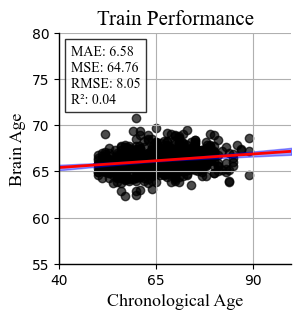

Error medio absoluto: 6.5753091948053015
Error cuadrático medio: 64.76366624412469
Raíz del error cuadrático medio: 8.047587604004363
Coeficiente de determinación (R²): 0.03744599685865413


In [255]:
Plotters.plot_regresion(y=df_CN_avg_train_1['y_pred'],x= df_CN_avg_train_1['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [256]:
results_labels_df_AD_test_1, results_per_fold_AD_test_1, df_AD_avg_test_1 = model_reg.test(X=X_AD_1, y=y_AD_1, ID= ID_AD_1, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_1)
results_labels_df_FTD_test_1, results_per_fold_FTD_test_1, df_FTD_avg_test_1 = model_reg.test(X=X_FTD_1, y=y_FTD_1, ID= ID_FTD_1, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_1)
results_labels_df_MCI_test_1, results_per_fold_MCI_test_1, df_MCI_avg_test_1 = model_reg.test(X=X_MCI_1, y=y_MCI_1, ID= ID_MCI_1, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_1)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

In [257]:
df_CN_seleccion_1 = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined_1 = df_CN_avg_test_1.merge(df_CN_seleccion_1, on='ID_unique', how='left')

df_AD_seleccion_1 = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined_1 = df_AD_avg_test_1.merge(df_AD_seleccion_1, on='ID_unique', how='left')

df_FTD_seleccion_1 = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined_1 = df_FTD_avg_test_1.merge(df_FTD_seleccion_1, on='ID_unique', how='left')

df_MCI_seleccion_1 = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined_1 = df_MCI_avg_test_1.merge(df_MCI_seleccion_1, on='ID_unique', how='left')



C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


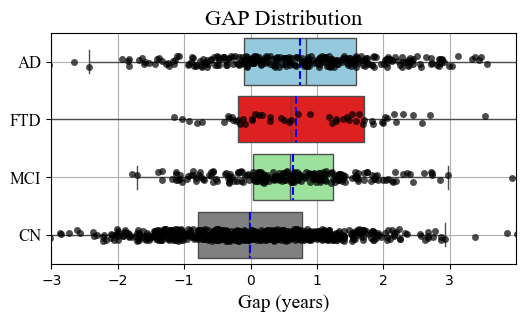

In [259]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(df_AD_avg_test_1['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test_1['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test_1['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test_1['GAP_corrected'])

data = {
    'Error': np.concatenate([ corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

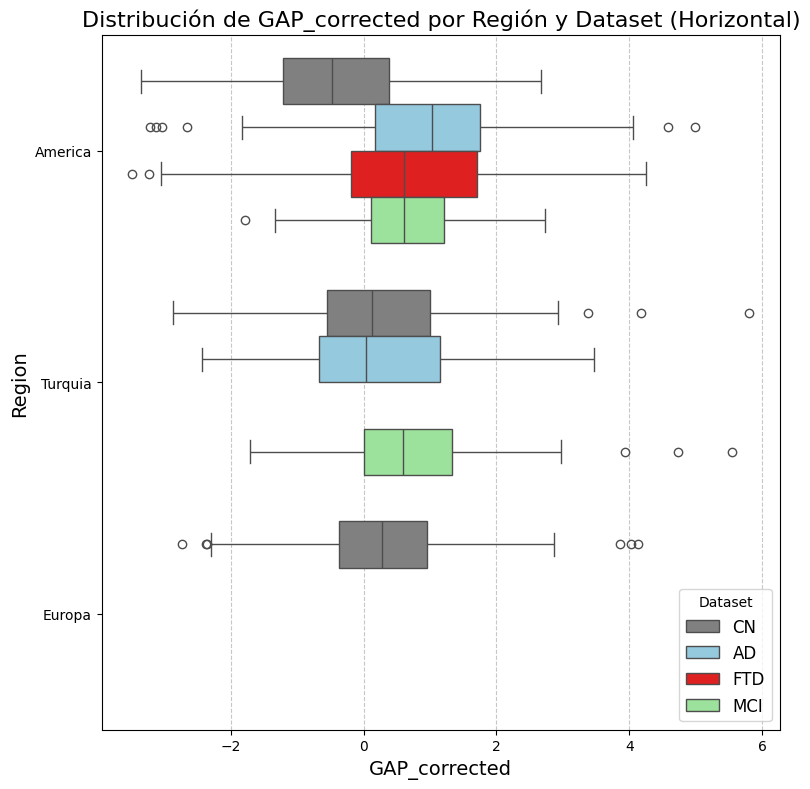

In [260]:
 

# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_combined_1,  df_AD_combined_1, df_FTD_combined_1, df_MCI_combined_1]
labels = ["CN",  "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray",  "Skyblue", "red", "lightgreen"]  # Ejemplo de colores

# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)


# Segundo Modelo

In [261]:
params_2 = {'alpha': 0.1,
            'l1_ratio': 1.0,
            'max_iter': 1000,
            'tol': 0.01}

In [262]:
results_labels_df_CN_train_2, results_labels_df_CN_test_2,  results_model_2, results_per_fold_CN_train_2, results_per_fold_CN_test_2, df_CN_avg_train_2,df_CN_avg_test_2= model_reg.trainer(
        X=X_CN_2,
        y=y_CN_2,
        ID_label='ID_unique',
        ID=ID_CN_2,
        n_splits=10,
        n_iterations=20,
        params_= params_2)

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [263]:
results_labels_df_AD_test_2, results_per_fold_AD_test_2, df_AD_avg_test_2 = model_reg.test(X=X_AD_2, y=y_AD_2, ID= ID_AD_2, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_2)
results_labels_df_FTD_test_2, results_per_fold_FTD_test_2, df_FTD_avg_test_2 = model_reg.test(X=X_FTD_2, y=y_FTD_2, ID= ID_FTD_2, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_2)
results_labels_df_MCI_test_2, results_per_fold_MCI_test_2, df_MCI_avg_test_2 = model_reg.test(X=X_MCI_2, y=y_MCI_2, ID= ID_MCI_2, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_2)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     53.84
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           6.31e-13
Time:                        00:12:05   Log-Likelihood:                -1253.3
No. Observations:                 672   AIC:                             2511.
Df Residuals:                     670   BIC:                             2520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.6048      0.491    127.591      0.0

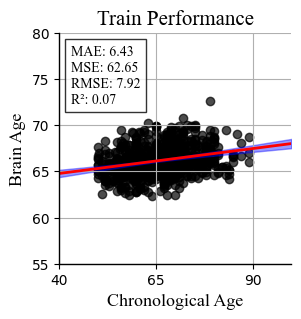

Error medio absoluto: 6.432533810001983
Error cuadrático medio: 62.65464180091253
Raíz del error cuadrático medio: 7.915468514302392
Coeficiente de determinación (R²): 0.06879150334812001


In [264]:
Plotters.plot_regresion(y=df_CN_avg_train_2['y_pred'],x= df_CN_avg_train_2['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [265]:
df_CN_seleccion_2 = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined_2 = df_CN_avg_test_2.merge(df_CN_seleccion_2, on='ID_unique', how='left')

df_AD_seleccion_2 = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined_2 = df_AD_avg_test_2.merge(df_AD_seleccion_2, on='ID_unique', how='left')

df_FTD_seleccion_2 = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined_2 = df_FTD_avg_test_2.merge(df_FTD_seleccion_2, on='ID_unique', how='left')

df_MCI_seleccion_2 = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined_2 = df_MCI_avg_test_2.merge(df_MCI_seleccion_2, on='ID_unique', how='left')



C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


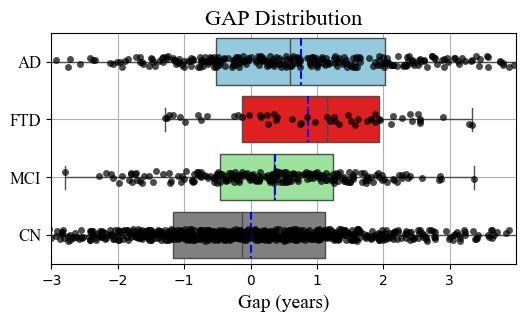

In [266]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(df_AD_avg_test_2['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test_2['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test_2['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test_2['GAP_corrected'])

data = {
    'Error': np.concatenate([ corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

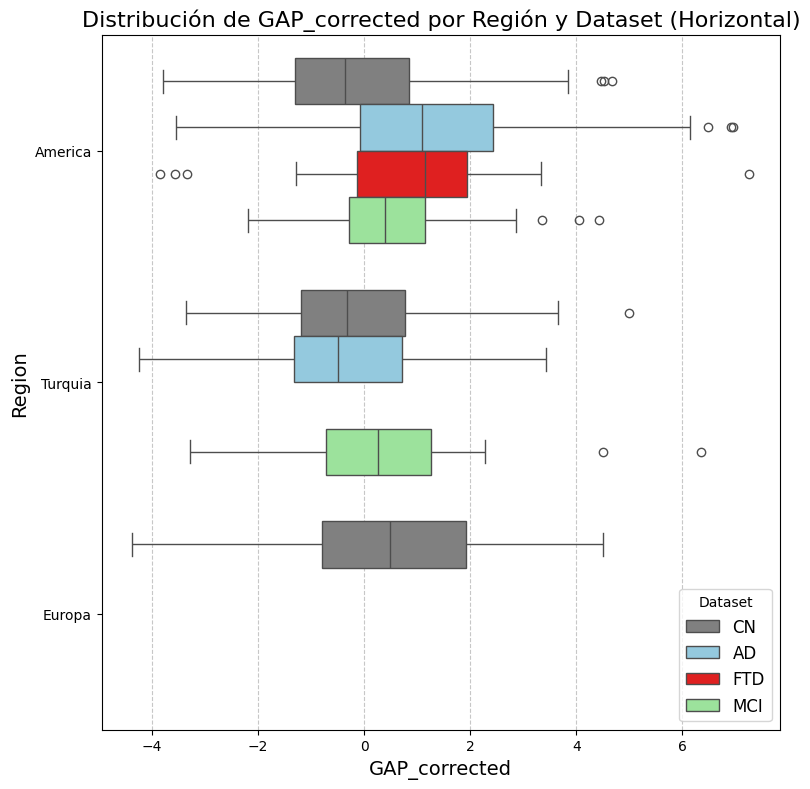

In [267]:
 

# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_combined_2,  df_AD_combined_2, df_FTD_combined_2, df_MCI_combined_2]
labels = ["CN",  "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray",  "Skyblue", "red", "lightgreen"]  # Ejemplo de colores

# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)


# Tercer Modelo

In [64]:
params_3 = {'alpha': 0.01,
            'l1_ratio': 1.0,
            'max_iter': 1000,
            'tol': 0.01}

In [65]:
results_labels_df_CN_train_3, results_labels_df_CN_test_3,  results_model_3, results_per_fold_CN_train_3, results_per_fold_CN_test_3, df_CN_avg_train_3,df_CN_avg_test_3= model_reg.trainer(
        X=X_CN_3,
        y=y_CN_3,
        ID_label='ID_unique',
        ID=ID_CN_3,
        n_splits=10,
        n_iterations=20,
        params_= params_3)

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [66]:
results_labels_df_AD_test_3, results_per_fold_AD_test_3, df_AD_avg_test_3 = model_reg.test(X=X_AD_3, y=y_AD_3, ID= ID_AD_3, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_3)
results_labels_df_FTD_test_3, results_per_fold_FTD_test_3, df_FTD_avg_test_3= model_reg.test(X=X_FTD_3, y=y_FTD_3, ID= ID_FTD_3, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_3)
results_labels_df_MCI_test_3, results_per_fold_MCI_test_3, df_MCI_avg_test_3 = model_reg.test(X=X_MCI_3, y=y_MCI_3, ID= ID_MCI_3, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model_3)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     68.98
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           5.51e-16
Time:                        14:02:09   Log-Likelihood:                -1455.7
No. Observations:                 672   AIC:                             2915.
Df Residuals:                     670   BIC:                             2924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.7129      0.663     91.567      0.0

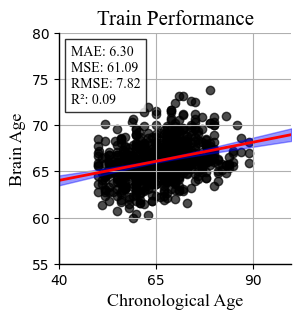

Error medio absoluto: 6.304448080061728
Error cuadrático medio: 61.08631274206949
Raíz del error cuadrático medio: 7.815773329752436
Coeficiente de determinación (R²): 0.09210089117897369


In [67]:
Plotters.plot_regresion(y=df_CN_avg_train_3['y_pred'],x= df_CN_avg_train_3['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [68]:
df_CN_seleccion_3 = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined_3 = df_CN_avg_test_3.merge(df_CN_seleccion_3, on='ID_unique', how='left')

df_AD_seleccion_3 = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined_3 = df_AD_avg_test_3.merge(df_AD_seleccion_3, on='ID_unique', how='left')

df_FTD_seleccion_3 = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined_3 = df_FTD_avg_test_3.merge(df_FTD_seleccion_3, on='ID_unique', how='left')

df_MCI_seleccion_3 = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined_3 = df_MCI_avg_test_3.merge(df_MCI_seleccion_3, on='ID_unique', how='left')



C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


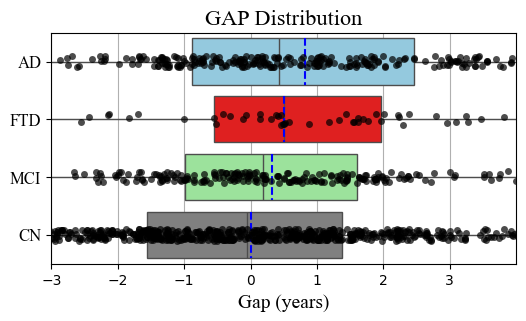

In [71]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(df_AD_avg_test_3['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test_3['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test_3['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test_3['GAP_corrected'])

data = {
    'Error': np.concatenate([ corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

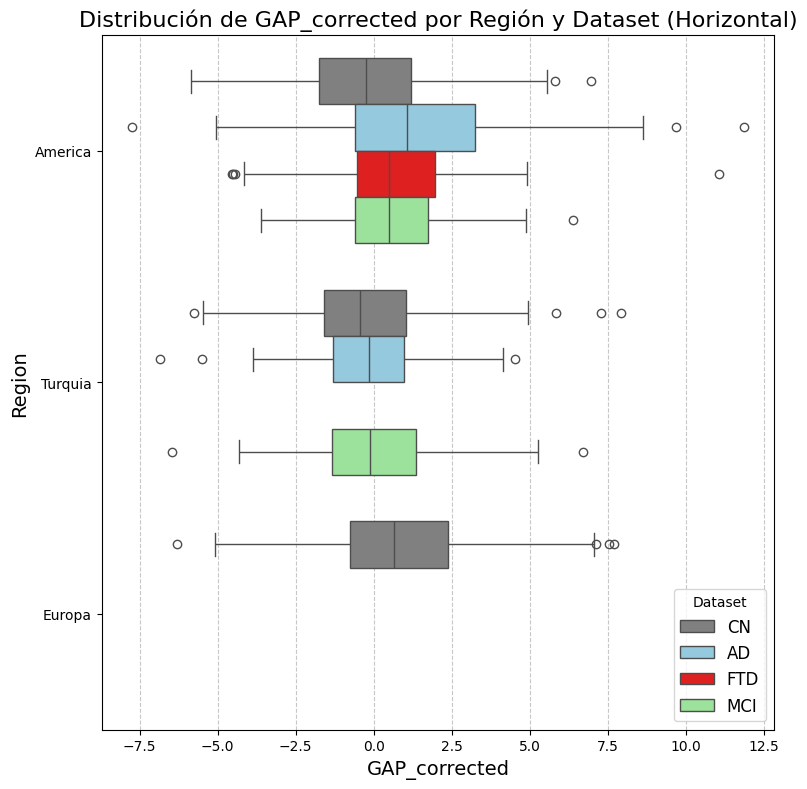

In [72]:
 

# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_combined_3,  df_AD_combined_3, df_FTD_combined_3, df_MCI_combined_3]
labels = ["CN",  "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray",  "Skyblue", "red", "lightgreen"]  # Ejemplo de colores

# Llamar a la función

graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)


# Promedio de Modelos

In [244]:
import pandas as pd

# Función para concatenar y promediar por 'ID_unique'
def promediar_dataframes(df1, df2):
    df_concatenado = pd.concat([df1, df2])
    df_promediado = df_concatenado.groupby('ID_unique', as_index=False).mean()
    return df_promediado

# Procesar cada conjunto de dataframes
df_CN_avg_test = promediar_dataframes(df_CN_avg_test_1, df_CN_avg_test_2)
df_CN_avg_train = promediar_dataframes(df_CN_avg_train_1, df_CN_avg_train_2)
df_AD_avg_test = promediar_dataframes(df_AD_avg_test_1, df_AD_avg_test_2)
df_FTD_avg_test = promediar_dataframes(df_FTD_avg_test_1, df_FTD_avg_test_2)
df_MCI_avg_test = promediar_dataframes(df_MCI_avg_test_1, df_MCI_avg_test_2)

# Mostrar resultados (opcional)
print("Promedio CN Test:")
print(df_CN_avg_test.head())
print("Promedio CN Train:")
print(df_CN_avg_train.head())
print("\nPromedio AD Test:")
print(df_AD_avg_test.head())
print("\nPromedio FTD Test:")
print(df_FTD_avg_test.head())
print("\nPromedio MCI Test:")
print(df_MCI_avg_test.head())


Promedio CN Test:
   ID_unique  y_labels     y_pred  y_pred_corrected       GAP  GAP_corrected
0        209      69.0  67.422571         70.194813 -1.577429       1.194813
1        210      73.0  65.119941         71.780308 -7.880059      -1.219692
2        211      68.0  66.715992         68.496630 -1.284008       0.496630
3        212      58.0  67.749687         59.827922  9.749687       1.827922
4        213      57.0  66.987259         58.076793  9.987259       1.076793
Promedio CN Train:
   ID_unique  y_labels     y_pred  y_pred_corrected       GAP  GAP_corrected
0        209      69.0  67.502615         70.242458 -1.497385       1.242458
1        210      73.0  65.459842         72.087609 -7.540158      -0.912391
2        211      68.0  66.671923         68.441959 -1.328077       0.441959
3        212      58.0  67.538410         59.586647  9.538410       1.586647
4        213      57.0  66.701646         57.779754  9.701646       0.779754

Promedio AD Test:
   ID_unique y_label

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     33.14
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.30e-08
Time:                        00:10:30   Log-Likelihood:                -979.33
No. Observations:                 672   AIC:                             1963.
Df Residuals:                     670   BIC:                             1972.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.3132      0.326    197.058      0.0

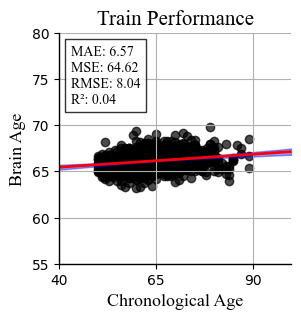

Error medio absoluto: 6.573025939708484
Error cuadrático medio: 64.62489553816617
Raíz del error cuadrático medio: 8.038961098187139
Coeficiente de determinación (R²): 0.03950848507597671


In [245]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [211]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = df_CN_avg_test.merge(df_CN_seleccion_2, on='ID_unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion_2, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion_2, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion_2, on='ID_unique', how='left')



C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


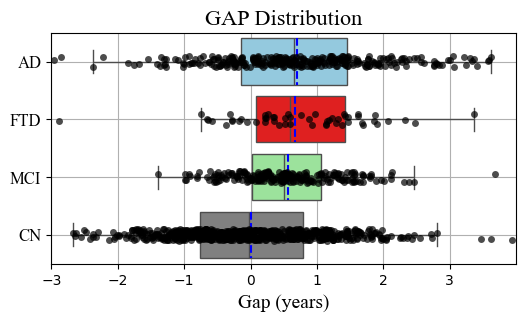

In [212]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(df_AD_avg_test['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test['GAP_corrected'])

data = {
    'Error': np.concatenate([ corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

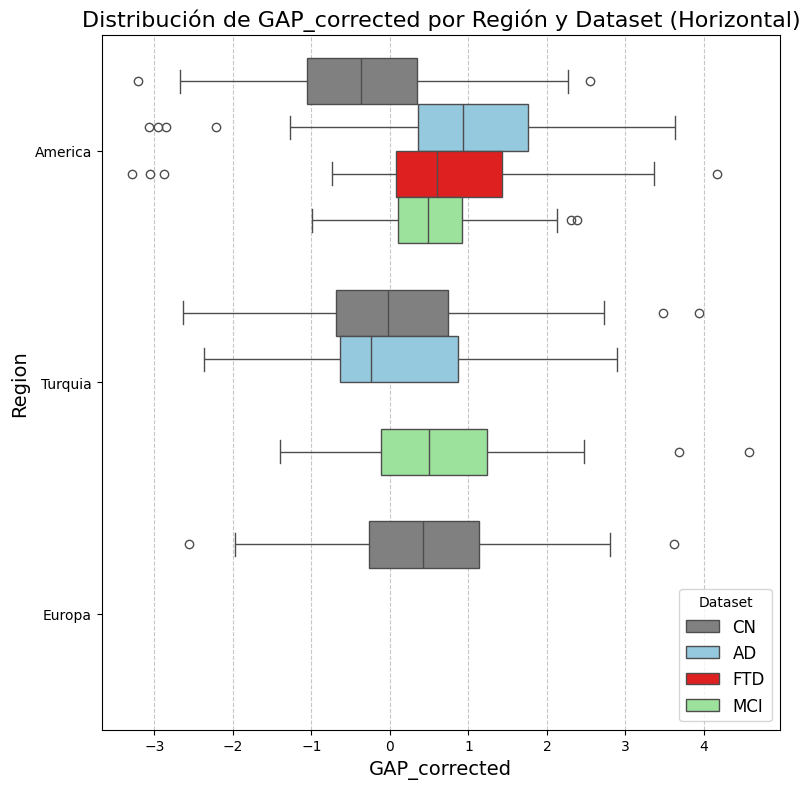

In [213]:
 

# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_combined,  df_AD_combined, df_FTD_combined, df_MCI_combined]
labels = ["CN",  "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray",  "Skyblue", "red", "lightgreen"]  # Ejemplo de colores

# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)


# Promedio 3 Modelos

In [232]:
import pandas as pd

# Función para concatenar y promediar por 'ID_unique'
def promediar_dataframes(df1, df2, df3):
    df_concatenado = pd.concat([df1, df2, df3])
    df_promediado = df_concatenado.groupby('ID_unique', as_index=False).mean()
    return df_promediado

# Procesar cada conjunto de dataframes
df_CN_avg_test = promediar_dataframes(df_CN_avg_test_1, df_CN_avg_test_2, df_CN_avg_test_3)
df_CN_avg_train = promediar_dataframes(df_CN_avg_train_1, df_CN_avg_train_2, df_CN_avg_train_3)
df_AD_avg_test = promediar_dataframes(df_AD_avg_test_1, df_AD_avg_test_2, df_AD_avg_test_3)
df_FTD_avg_test = promediar_dataframes(df_FTD_avg_test_1, df_FTD_avg_test_2, df_FTD_avg_test_3)
df_MCI_avg_test = promediar_dataframes(df_MCI_avg_test_1, df_MCI_avg_test_2, df_MCI_avg_test_3)

# Mostrar resultados (opcional)
print("Promedio CN Test:")
print(df_CN_avg_test.head())
print("\nPromedio CN Train:")
print(df_CN_avg_train.head())
print("\nPromedio AD Test:")
print(df_AD_avg_test.head())
print("\nPromedio FTD Test:")
print(df_FTD_avg_test.head())
print("\nPromedio MCI Test:")
print(df_MCI_avg_test.head())


Promedio CN Test:
   ID_unique  y_labels     y_pred  y_pred_corrected       GAP  GAP_corrected
0        209      69.0  67.786943         70.538118 -1.213057       1.538118
1        210      73.0  64.760862         71.370283 -8.239138      -1.629717
2        211      68.0  67.043949         68.810331 -0.956051       0.810331
3        212      58.0  67.653641         59.791886  9.653641       1.791886
4        213      57.0  66.718247         57.871949  9.718247       0.871949

Promedio CN Train:
   ID_unique  y_labels     y_pred  y_pred_corrected       GAP  GAP_corrected
0        209      69.0  67.885716         70.604336 -1.114284       1.604336
1        210      73.0  65.204552         71.781023 -7.795448      -1.218977
2        211      68.0  67.007165         68.763571 -0.992835       0.763571
3        212      58.0  67.427719         59.537557  9.427719       1.537557
4        213      57.0  66.353907         57.501502  9.353907       0.501502

Promedio AD Test:
   ID_unique y_labe

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     41.79
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.96e-10
Time:                        00:06:59   Log-Likelihood:                -1060.2
No. Observations:                 672   AIC:                             2124.
Df Residuals:                     670   BIC:                             2133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.8162      0.368    173.355      0.0

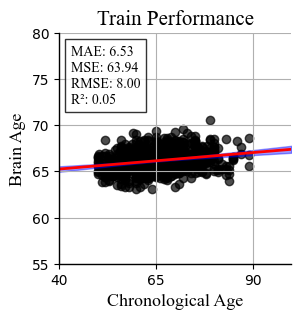

Error medio absoluto: 6.529142664641527
Error cuadrático medio: 63.940444933593035
Raíz del error cuadrático medio: 7.9962769420270225
Coeficiente de determinación (R²): 0.049681174603789846


In [233]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [234]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = df_CN_avg_test.merge(df_CN_seleccion_2, on='ID_unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion_2, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion_2, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion_2, on='ID_unique', how='left')



C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


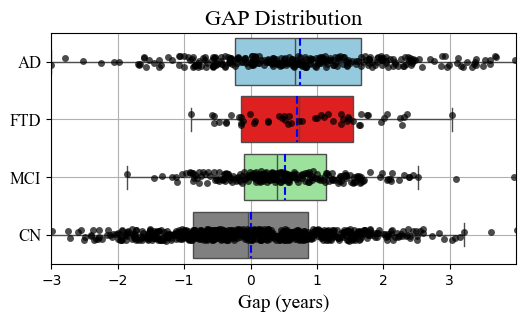

In [235]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(df_AD_avg_test['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test['GAP_corrected'])

data = {
    'Error': np.concatenate([ corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

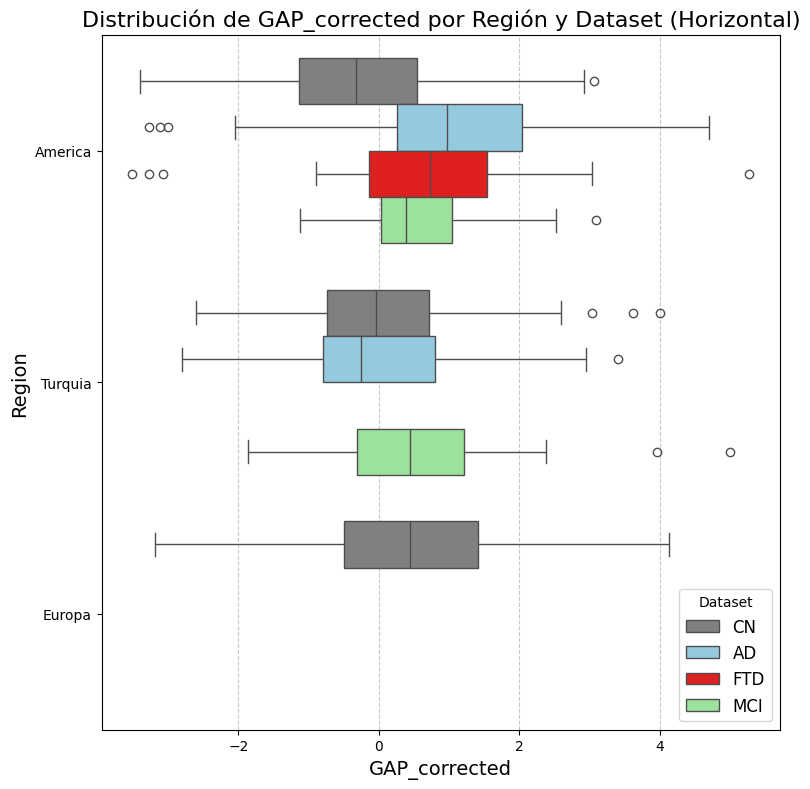

In [236]:
 

# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_combined,  df_AD_combined, df_FTD_combined, df_MCI_combined]
labels = ["CN",  "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray",  "Skyblue", "red", "lightgreen"]  # Ejemplo de colores

# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)
